In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercício 1

Uma das métricas mais utilizadas em problemas de regressão é o erro absoluto percentual médio -- MAPE, ou *Mean Absolute Percentage Error*. Esta métrica não está disponível no pacote *scikit-learn*, mas você precisa desta medida para poder comparar seus modelos de regressão baseados em aprendizado de máquina com os modelos estatísticos atualmente aplicados em sua empresa.

Desenvolva uma função que seja capaz de retornar esta métrica para você. 

In [5]:
import numpy as np

def mape(y_true, y_pred, axis=None):
    # Digite aqui sua função para calcular o erro médio percentual absoluto

    return (1)

y = np.array([100,150,80,0], dtype=np.float64)
y_pred = np.array([120, 130,90,15])
mape(y, y_pred)

1

## Exercício 2

Dado a seguinte amostra de dado X e y mostrada no gráfico abaixo.

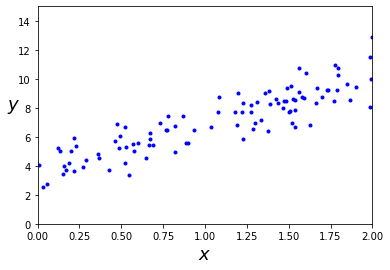

In [6]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ = plt.axis([0,2,0,15])

A função cal_cost abaixo mostra calcula o custo de um erro a partir dos vetores theta, X e y.
Com base nas equações dadas, desenvolva a função de Gradiente Descendente, para atualizar o vetor Theta do modeo linear abaixo.

In [7]:
def cost(theta,X,y):
    ''' 
    Cálculo do custo para um dado X e Y, dado vetor de thetas. 
    '''
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [10]:
def gradient_descent(X,y,theta,lr=0.01,iterations=100):
    '''
    Retorna o vetor theta ajustado para um dado X e Y utilizando o algoritmo de gradiente descendente.
    '''
    m = len(y)
    for it in range(iterations):
        # Modifique o theta a cada iteração, a partir da derivada da funçaõ custo * taxa de aprendizado
        it
    return theta

Theta0:          0.207,
Theta1:          0.782
Custo fin./MSE:  197413.958


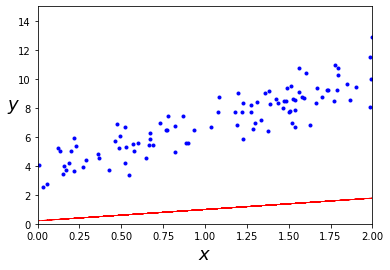

In [11]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta = gradient_descent(X_b,y,theta,lr,n_iter)

# Plota curva ajustada e problema inicial
plt.plot(X, X_b.dot(theta), 'r--', lw=0.8)

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ = plt.axis([0,2,0,15])

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Custo fin./MSE:  {:0.3f}'.format(cost(theta, X_b, y)))


## Exercício 3

Agora iremos realizar o mesmo procedimento do exercício 2, porém adaptado ao modelo de regressão logístico binário, próprio para classificações.

Dado o novo conjunto de dados abaixo, com as classes 1 e 0:


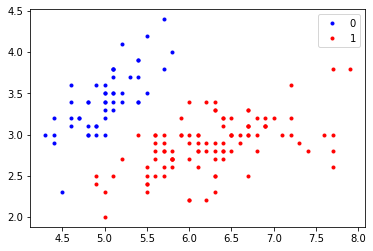

In [12]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, :2]
y = (iris.target != 0) * 1

plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], 'b.', label='0')
plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], 'r.', label='1')
plt.legend();

A função de custo que iremoz minimizar agora será a função *loss()*, e a função *sigmoid()* faz a transformação da saída linear para uma função logística.

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradient_descent_logit(X,y,theta,lr=0.01,iterations=100):
    '''
    Retorna o vetor theta ajustado para um dado X e Y utilizando o algoritmo de gradiente descendente, adaptado a regressão logística.
    '''
    m = len(y)
    for it in range(iterations):
        # Modifique o theta a cada iteração, a partir da derivada da função da derivada da função de perda * taxa de aprendizado
        it
    return theta

Theta0:          0.000,
Theta1:          0.000
Função de perda:  0.693


C:\Users\rodri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: No contour levels were found within the data range.
  app.launch_new_instance()


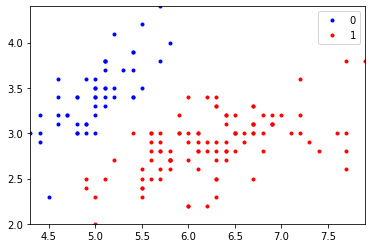

In [19]:
lr =0.1
n_iter = 1000

theta = np.zeros(X.shape[1])
theta = gradient_descent_logit(X,y,theta,lr,n_iter)

plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], 'b.', label='0')
plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], 'r.', label='1')
plt.legend();

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigmoid(np.dot(grid, theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0], theta[1]))
print('Função de perda:  {:0.3f}'.format(loss(sigmoid(np.dot(X,theta)), y)))